# Artificial Neural Networks
- Disini kita akan membuat jaringan saraf tiruan.
- Faktanya, Jaringan Syaraf Tiruan mirip dengan Regresi Logistik.

## 2 Jaringan Neural Network
- Pertama, lihat jaringan syaraf tiruan 2 lapis dengan beberapa tahapan
- Kita menggunakan 1 layer tersembunyi dan 3 neuron buatan

### Tahapan
- Inisialisasi parameter
- Forward Propagation
- Compute Loss and Cost Function.
- Backward Propagation
- Update weight and bias
- Repeat n times

### Imports

In [1]:
import numpy as np # Linear algebra.
import pandas as pd # Data processing.
import matplotlib.pyplot as plt # Visualize

from sklearn.model_selection import train_test_split # For data split.
from sklearn.model_selection import cross_val_score # For find accuracy.

import warnings
warnings.filterwarnings('ignore')

### Prepare Dataset

In [2]:
data = pd.read_csv("data.csv")
data.drop(["id"],axis = 1,inplace = True)

data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis] # M = 1, B = 0

x_data = data.drop(["diagnosis","Unnamed: 32"],axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values # Normalize data
y = data.diagnosis

### Train - Test Split

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.15, random_state = 42) # 85% Train, 15% Test

x_train = x_train.values.T
x_test = x_test.values.T
y_test = y_test.values.reshape(1,y_test.shape[0])
y_train = y_train.values.reshape(1,y_train.shape[0])

### Initialize Parameters
- Untuk memulai perulangan kita perlu memberikan nilai awal secara intuitif.

In [4]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0
    return w, b

### Fungsi Aktivasi
- Kami akan menggunakan fungsi sigmoid
- Faktanya, tidak logis menggunakan fungsi sigmoid di jaringan saraf tiruan kecuali antara lapisan tersembunyi dan keluaran.
- Kita mengabaikannya karena tujuan kita saat ini adalah untuk belajar

In [5]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z)) # It is the formule of sigmoid function
    return y_head

### Forward - Backward Propagation
- Pertama kita akan memperkirakan dengan nilai bias dan bobot kemudian kita akan kembali dan memperbarui bobot dan bias kita jika hasilnya salah.

In [6]:
def forward_backward_propagation(w,b,x_train,y_train):
    y_head = sigmoid(np.dot(w.T,x_train) + b) # We multiply features with our weight values, add bias and send it to sigmoid function
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) # It is the formule of loss function
    cost = (np.sum(loss))/x_train.shape[1] # Calculate cost function
    
    derivative_weight = (np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1] # Calculate derivative of weights
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1] # Calculate derivative of bias
    
    gradients = {"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    return cost,gradients

### Update Parameters

In [7]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        # Start learning
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train) # Make forward and backward propagation and calculate cost and derivatives
        cost_list.append(cost)
        # Updating weight and bias
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 250 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"w": w,"b": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

### Predict

In [8]:
def prediction(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b) # z -> Estimates of our model
    y_prediction = np.zeros((1,x_test.shape[1])) # We create an array, we will set the array.
    
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1

    return y_prediction

### Create Model

In [9]:
def artificial_neural_networks(x_train,x_test,y_train,y_test,learning_rate,number_of_iteration):
    dimension = x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension) # Initialize Parameters
    parameters,gradients, cost_list = update(w,b,x_train,y_train,learning_rate,number_of_iteration) # Update parameters
    
    train_prediction = prediction(parameters["w"],parameters["b"],x_train) # Estimates of our model
    test_prediction = prediction(parameters["w"],parameters["b"],x_test) # Estimates of our model
    
    print("Train accuracy: {} %".format(100 - np.mean(np.abs(train_prediction - y_train)) * 100))
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(test_prediction - y_test)) * 100))

Cost after iteration 0: 0.692836
Cost after iteration 250: 0.158517
Cost after iteration 500: 0.125103
Cost after iteration 750: 0.109693
Cost after iteration 1000: 0.100409
Cost after iteration 1250: 0.094055
Cost after iteration 1500: 0.089353
Cost after iteration 1750: 0.085686
Cost after iteration 2000: 0.082714
Cost after iteration 2250: 0.080237
Cost after iteration 2500: 0.078126
Cost after iteration 2750: 0.076295
Cost after iteration 3000: 0.074683
Cost after iteration 3250: 0.073248
Cost after iteration 3500: 0.071958
Cost after iteration 3750: 0.070789
Cost after iteration 4000: 0.069721
Cost after iteration 4250: 0.068740
Cost after iteration 4500: 0.067835
Cost after iteration 4750: 0.066995


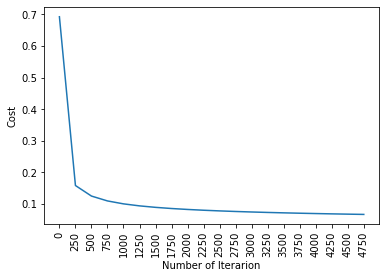

Train accuracy: 98.34368530020704 %
Test accuracy: 97.67441860465117 %


In [10]:
learning_rate = 1
number_of_iteration = 5000
ann = artificial_neural_networks(x_train,x_test,y_train,y_test,learning_rate,number_of_iteration)

## L Layer Neural Network

- kita akan menggunakan 3 hidden layer.
- kita akan menggunakan 'keras'. karena cara ini mudah untuk membuat ANN model
- Dalam model ini, kita akan menghitung akurasi dengan skor validasi silang

### Imports

In [11]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Terminology
- units -> Number of Neuron
- kernel_initializer (uniform) -> initialize values
- activation -> Our activation function. We use tanh
- input_dim -> Number of Feature
- optimizer (adam) -> adaptive moment estimation. (You can search in Google)
- loss -> Our loss function
- metrics -> Accuracy

In [12]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = "uniform", activation = "tanh", input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = "uniform", activation = "tanh"))
    classifier.add(Dense(units = 2, kernel_initializer = "uniform", activation = "tanh"))
    classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer = "adam", loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier

In [13]:
x_train = x_train.T
y_train = y_train.T

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100) # epoch -> Number of Iteration
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3) # Cross validation score
mean = accuracies.mean()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
322/322 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.6118
Epoch 2/100
322/322 [==============================] - 0s 78us/step - loss: 0.6916 - accuracy: 0.6118
Epoch 3/100
322/322 [==============================] - 0s 93us/step - loss: 0.6905 - accuracy: 0.6118
Epoch 4/100
322/322 [==============================] - 0s 90us/step - loss: 0.6893 - accuracy: 0.6118
Epoch 5/100
322/322 [==============================] - 0s 78us/step - loss: 0.6883 - accuracy: 0.6118
Epoch 6/100
322/322 [==============================] - 0s 93us/step - loss: 0.6872 - accuracy: 0.6118
Epoch 7/100
322/322 [==============================] - 0s 99us/step - loss: 0.6853 - accuracy: 0.6118
Epoch 8/100
322/322 [==============================] - 0s 106us/step - loss: 0.6822 - accuracy: 0.6118
Epoch 9/100
322/322 [==============================] - 0s 99us/step - loss: 0.6778 - accu

322/322 [==============================] - 0s 99us/step - loss: 0.1920 - accuracy: 0.9658
Epoch 76/100
322/322 [==============================] - 0s 103us/step - loss: 0.1881 - accuracy: 0.9720
Epoch 77/100
322/322 [==============================] - 0s 90us/step - loss: 0.1887 - accuracy: 0.9720
Epoch 78/100
322/322 [==============================] - 0s 131us/step - loss: 0.1868 - accuracy: 0.9689
Epoch 79/100
322/322 [==============================] - 0s 93us/step - loss: 0.1797 - accuracy: 0.9783
Epoch 80/100
322/322 [==============================] - 0s 93us/step - loss: 0.1778 - accuracy: 0.9752
Epoch 81/100
322/322 [==============================] - 0s 81us/step - loss: 0.1754 - accuracy: 0.9783
Epoch 82/100
322/322 [==============================] - 0s 90us/step - loss: 0.1733 - accuracy: 0.9814
Epoch 83/100
322/322 [==============================] - 0s 93us/step - loss: 0.1711 - accuracy: 0.9752
Epoch 84/100
322/322 [==============================] - 0s 81us/step - loss: 0.1712 

322/322 [==============================] - 0s 96us/step - loss: 0.2461 - accuracy: 0.9658
Epoch 55/100
322/322 [==============================] - 0s 84us/step - loss: 0.2413 - accuracy: 0.9689
Epoch 56/100
322/322 [==============================] - 0s 78us/step - loss: 0.2370 - accuracy: 0.9658
Epoch 57/100
322/322 [==============================] - 0s 81us/step - loss: 0.2335 - accuracy: 0.9627
Epoch 58/100
322/322 [==============================] - 0s 84us/step - loss: 0.2318 - accuracy: 0.9658
Epoch 59/100
322/322 [==============================] - 0s 99us/step - loss: 0.2290 - accuracy: 0.9627
Epoch 60/100
322/322 [==============================] - 0s 93us/step - loss: 0.2225 - accuracy: 0.9720
Epoch 61/100
322/322 [==============================] - 0s 99us/step - loss: 0.2181 - accuracy: 0.9658
Epoch 62/100
322/322 [==============================] - 0s 87us/step - loss: 0.2184 - accuracy: 0.9689
Epoch 63/100
322/322 [==============================] - 0s 90us/step - loss: 0.2123 - 

322/322 [==============================] - 0s 75us/step - loss: 0.3555 - accuracy: 0.9503
Epoch 34/100
322/322 [==============================] - 0s 81us/step - loss: 0.3469 - accuracy: 0.9565
Epoch 35/100
322/322 [==============================] - 0s 93us/step - loss: 0.3394 - accuracy: 0.9565
Epoch 36/100
322/322 [==============================] - 0s 81us/step - loss: 0.3335 - accuracy: 0.9503
Epoch 37/100
322/322 [==============================] - 0s 75us/step - loss: 0.3259 - accuracy: 0.9627
Epoch 38/100
322/322 [==============================] - 0s 81us/step - loss: 0.3178 - accuracy: 0.9658
Epoch 39/100
322/322 [==============================] - 0s 87us/step - loss: 0.3134 - accuracy: 0.9565
Epoch 40/100
322/322 [==============================] - 0s 87us/step - loss: 0.3048 - accuracy: 0.9596
Epoch 41/100
322/322 [==============================] - 0s 96us/step - loss: 0.2991 - accuracy: 0.9596
Epoch 42/100
322/322 [==============================] - 0s 87us/step - loss: 0.2938 - 

In [14]:
print(accuracies)
print("Accuracy mean :",mean)

[0.98757762 0.97515529 0.93788821]
Accuracy mean : 0.9668737053871155
